# Python code for a paper "An investigation of the false discovery rate and the misinterpretation of p-values" by David Colquhoun published in Royal Society Open Science 2014

##### Some general settings

In [1]:
%matplotlib inline
from pylab import*
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower

## Two mean simulation

##### Set mean and SD for Sample1 and Sample2

In [2]:
mu1, sd1 = 0.0, 1.0
mu2, sd2 = 1.0, 1.0
n1 = 16    #number of obs per sample

#### Plot distribution of observations for Sample1 and Sample2

In [3]:
xmin = mu1 - 4 * sd1
xmax = mu1 + 4 * sd1
increase = (xmax - xmin) / 100
x = np.arange(xmin, xmax, increase)

In [4]:
dist1 = stats.norm(mu1, sd1)
y1 = dist1.pdf(x)
dist2 = stats.norm(mu2, sd2)
y2 = dist2.pdf(x)

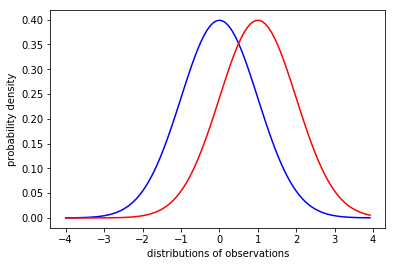

In [5]:
plot(x, y1, 'b-')
plot(x, y2, 'r-')
xlabel('distributions of observations')
ylabel('probability density');

#### Plot distribution of means for Sample1 and Sample2

In [6]:
sdm1 = sd1 / sqrt(n1)
sdm2 = sd2 / sqrt(n1)
dist1m = stats.norm(mu1, sdm1)
y1m = dist1m.pdf(x)
dist2m = stats.norm(mu2, sdm2)
y2m = dist2m.pdf(x)

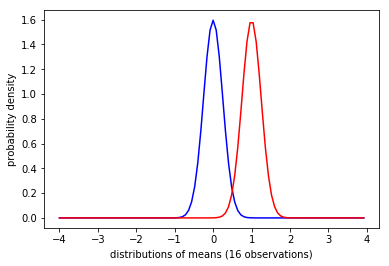

In [7]:
plot(x, y1m, 'b-')
plot(x, y2m, 'r-')
xlabel('distributions of means (16 observations)')
ylabel('probability density');

#### Run simulations

In [8]:
def run_simulation(mean, sigma, n, nsim):
    #initialisations
    pval = np.zeros(nsim)
    diff = np.zeros(nsim)
    #loCI = np.zeros(nsim)
    #hiCI = np.zeros(nsim)
    
    for r in range(nsim):
        s1, s2 = np.random.multivariate_normal(mean, sigma, n).T
        sd = s2 - s1
        t, p = stats.ttest_ind(s1, s2, equal_var=False, nan_policy='omit')
        diff[r] = np.mean(s1) - np.mean(s2)
        pval[r] = p
        #low, high = stats.t.interval(0.95, len(sd)-1, loc=np.mean(sd), scale=stats.sem(sd))
        #loCI[r] = low
        #hiCI[r] = high
    
    return diff, pval

In [9]:
mean1 = np.array([mu1, mu2])
#set covariance matrix
cor = 0.0   #correlation = 0
var1 = sd1**2
var2 = sd2**2
sigma1 = np.array([[var1, cor], [cor, var2]]) #matrix(c(myvar1,mycor,mycor,myvar2),2,2)

In [10]:
nsim1 = 10000 # number of simulation jobs to run
diff1, pval1 = run_simulation(mean1, sigma1, n1, nsim1)

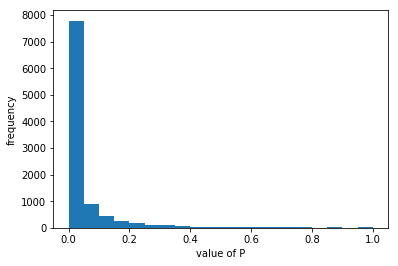

In [11]:
plt.hist(pval1, bins=20);
xlabel('value of P')
ylabel('frequency');

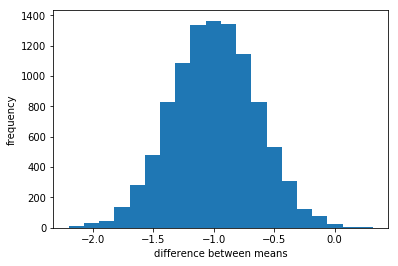

In [12]:
plt.hist(diff1, bins=20);
xlabel('difference between means')
ylabel('frequency');

In [13]:
#set min and max P values for "significance"
Pmin, Pmax = 0.0, 0.05
# nsig: counts number of pval between and myPmax =0.0
nsig = pval1[(pval1 > Pmin) & (pval1 <= Pmax)].size
#mean observed difference for expts with Pmin<P<=Pmax
meandiff = np.sum(diff1[(pval1 > Pmin) & (pval1 <= Pmax)]) / nsig

In [14]:
effect_size = (mu2 - mu1) / sd1
print('effect size=', effect_size)

effect size= 1.0


In [15]:
# calculate test power
Psig = 0.05
nrej = pval1[pval1 <= Psig].size
power_analysis = TTestIndPower()
pwr = power_analysis.power(effect_size, n1, Psig)
print('Power =', pwr, 'for P =', Psig)
print('(alternative power calculation =', nrej / float(nsim1), ')')

Power = 0.7813977845875587 for P = 0.05
(alternative power calculation = 0.7791 )


In [16]:
n001 = pval1[pval1 <= 0.001].size  #counts number of P<0.001
n01 = pval1[(pval1 > 0.001) & (pval1 <= 0.01)].size  #counts number of 0.001<P<0.01
n05 = pval1[(pval1 > 0.01) & (pval1 <= 0.05)].size  #counts number of 0.01<P<0.05
ns = pval1[pval1 > 0.05].size  #counts number of P>0.05 "non sig"

In [17]:
print("Number of (P <= 0.001) = ", n001, "(=", 100*n001/nsim1, "%)")
print("Number of (0.001 < P <= 0.01) = ", n01, "(=", 100*n01/nsim1,"%)")
print("Number of (0.01 < P <= 0.05) = ", n05, "(=", 100*n05/nsim1,"%)")
print("Number of (P > 0.05) = ", ns, "(=",100*ns/nsim1,"%)")
print("Number of (P <= 0.05) = ", nsim1-ns, "(", 100*(nsim1-ns)/nsim1,"%)")
print("\n","Observed difference between means for 'sig' results = ", 
      meandiff, " True value = ", mu1-mu2)

Number of (P <= 0.001) =  2284 (= 22.84 %)
Number of (0.001 < P <= 0.01) =  3058 (= 30.58 %)
Number of (0.01 < P <= 0.05) =  2449 (= 24.49 %)
Number of (P > 0.05) =  2209 (= 22.09 %)
Number of (P <= 0.05) =  7791 ( 77.91 %)

 Observed difference between means for 'sig' results =  -1.127876302739111  True value =  -1.0


### Plot P value ditribution for a case with 4 observations per group

In [18]:
nsim1 = 10000 # number of simulation jobs to run
n2 = 4
diff2, pval2 = run_simulation(mean1, sigma1, n2, nsim1)

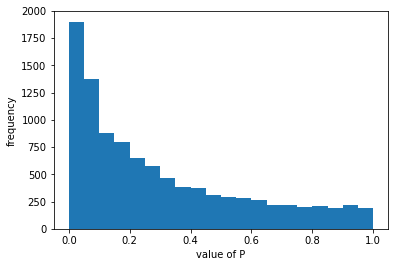

In [19]:
plt.hist(pval2, bins=20);
xlabel('value of P')
ylabel('frequency');

### Calculate P and observed difference for two samples with equal means

In [20]:
mu, sd = 0.0, 1.0
n = 16    #number of obs per sample

In [21]:
mean = np.array([mu, mu])
#set covariance matrix
cor = 0.0   #correlation = 0
var = sd**2
sigma = np.array([[var, cor], [cor, var]])

In [22]:
nsim1 = 10000 # number of simulation jobs to run
diff, pval = run_simulation(mean, sigma, n, nsim1)

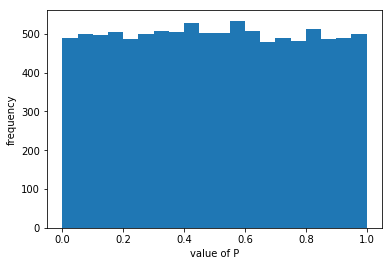

In [23]:
plt.hist(pval, bins=20);
xlabel('value of P')
ylabel('frequency');

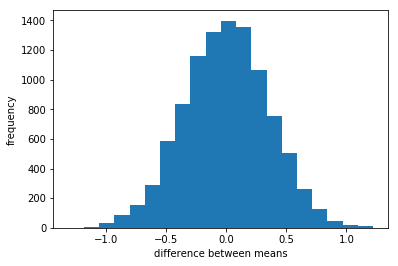

In [24]:
plt.hist(diff, bins=20);
xlabel('difference between means')
ylabel('frequency');